<a href="https://www.kaggle.com/code/mohammadragab/rsna-csf-cervical-spine-fracture-eda?scriptVersionId=102260747" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
 
from sklearn import preprocessing

import pydicom

import warnings


In [2]:
train = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")
train.shape

(2019, 9)

In [3]:
train.dtypes


StudyInstanceUID    object
patient_overall      int64
C1                   int64
C2                   int64
C3                   int64
C4                   int64
C5                   int64
C6                   int64
C7                   int64
dtype: object

In [4]:
train.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0


In [5]:
train.StudyInstanceUID.nunique()

2019

In [6]:
c=train.corr()
print(c)


                 patient_overall        C1        C2        C3        C4  \
patient_overall         1.000000  0.292947  0.425382  0.203222  0.249438   
C1                      0.292947  1.000000  0.194372  0.027875 -0.015381   
C2                      0.425382  0.194372  1.000000  0.104359 -0.001550   
C3                      0.203222  0.027875  0.104359  1.000000  0.295904   
C4                      0.249438 -0.015381 -0.001550  0.295904  1.000000   
C5                      0.309908  0.030165 -0.041198  0.157658  0.343023   
C6                      0.418405 -0.027961 -0.058301  0.061574  0.103534   
C7                      0.515843 -0.035833 -0.077157 -0.001404  0.010995   

                       C5        C6        C7  
patient_overall  0.309908  0.418405  0.515843  
C1               0.030165 -0.027961 -0.035833  
C2              -0.041198 -0.058301 -0.077157  
C3               0.157658  0.061574 -0.001404  
C4               0.343023  0.103534  0.010995  
C5               1.000000  

In [7]:
test = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/test.csv")
test.shape

(3, 3)

In [8]:
test.dtypes

row_id              object
StudyInstanceUID    object
prediction_type     object
dtype: object

In [9]:
test.head()

,row_id,StudyInstanceUID,prediction_type
0,1.2.826.0.1.3680043.10197_C1,1.2.826.0.1.3680043.10197,C1
1,1.2.826.0.1.3680043.10454_C1,1.2.826.0.1.3680043.10454,C1
2,1.2.826.0.1.3680043.10690_C1,1.2.826.0.1.3680043.10690,C1


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


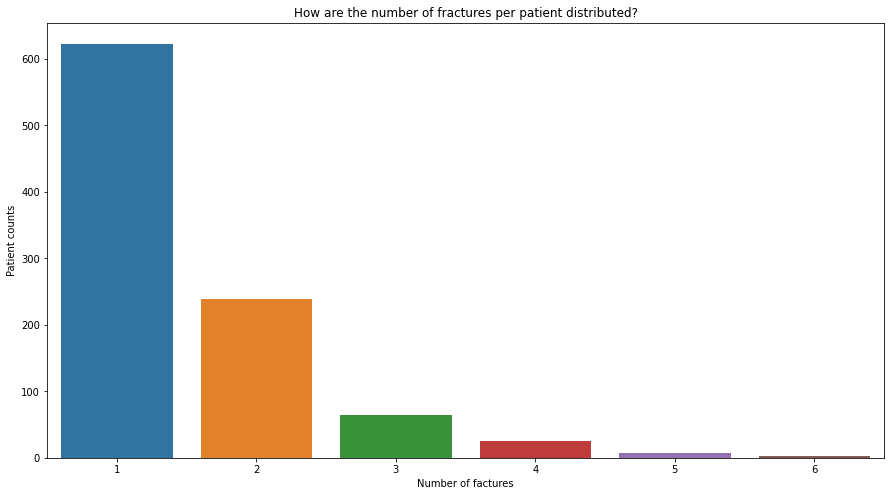

In [10]:
fracture_counts = train[train.patient_overall==1].drop(["StudyInstanceUID", "patient_overall"], axis=1).sum(axis=1)
plt.figure(figsize=(15,8))
sns.countplot(fracture_counts)
plt.title("How are the number of fractures per patient distributed?")
plt.xlabel("Number of factures")
plt.ylabel("Patient counts");

A lot of patients have only one fracture. But for those with multiple fractures it can be interesting to explore whether specific combinations are more likely than others. Perhaps I will come back to that part later.

# Exploring an example dicom file


In [11]:
example = "../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.10001/104.dcm"
example_file = pydicom.dcmread(example)
example_file

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10001.1.104
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.10001.1.104
(0008, 0023) Content Date                        DA: '20220727'
(0008, 0033) Content Time                        TM: '175846.805693'
(0010, 0010) Patient's Name                      PN: '10001'
(0010, 0020) Patient ID                          LO: '10001'
(0018, 0050) Slice Thickness                     DS: '0.625'
(0020, 000d) Study Instance UID                  UI: 1.2.826

In [12]:
image = example_file.pixel_array.flatten()
rescaled_image = image * example_file.RescaleSlope + example_file.RescaleIntercept

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


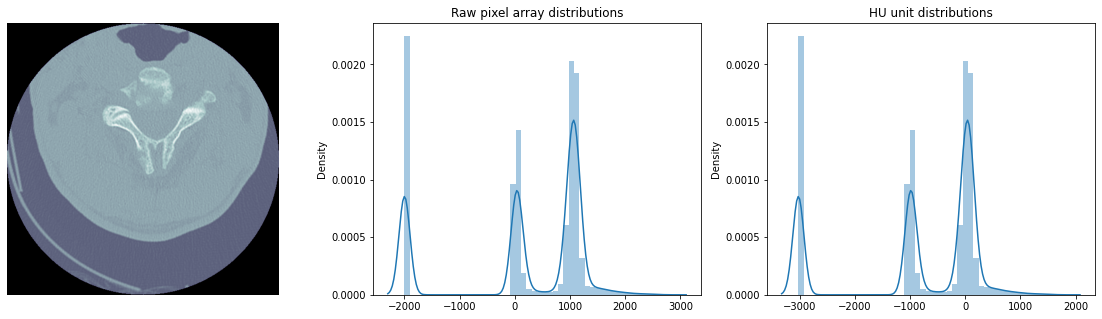

In [13]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].imshow(example_file.pixel_array,cmap="bone")
ax[0].axis("off")
sns.distplot(image.flatten(), ax=ax[1]);
sns.distplot(rescaled_image.flatten(), ax=ax[2])
ax[1].set_title("Raw pixel array distributions")
ax[2].set_title("HU unit distributions");

<AxesSubplot:>

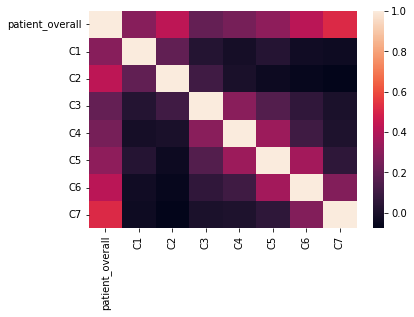

In [14]:
sns.heatmap(c)

<AxesSubplot:>

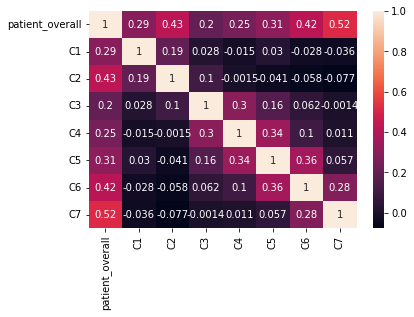

In [15]:
sns.heatmap(c,annot=True)


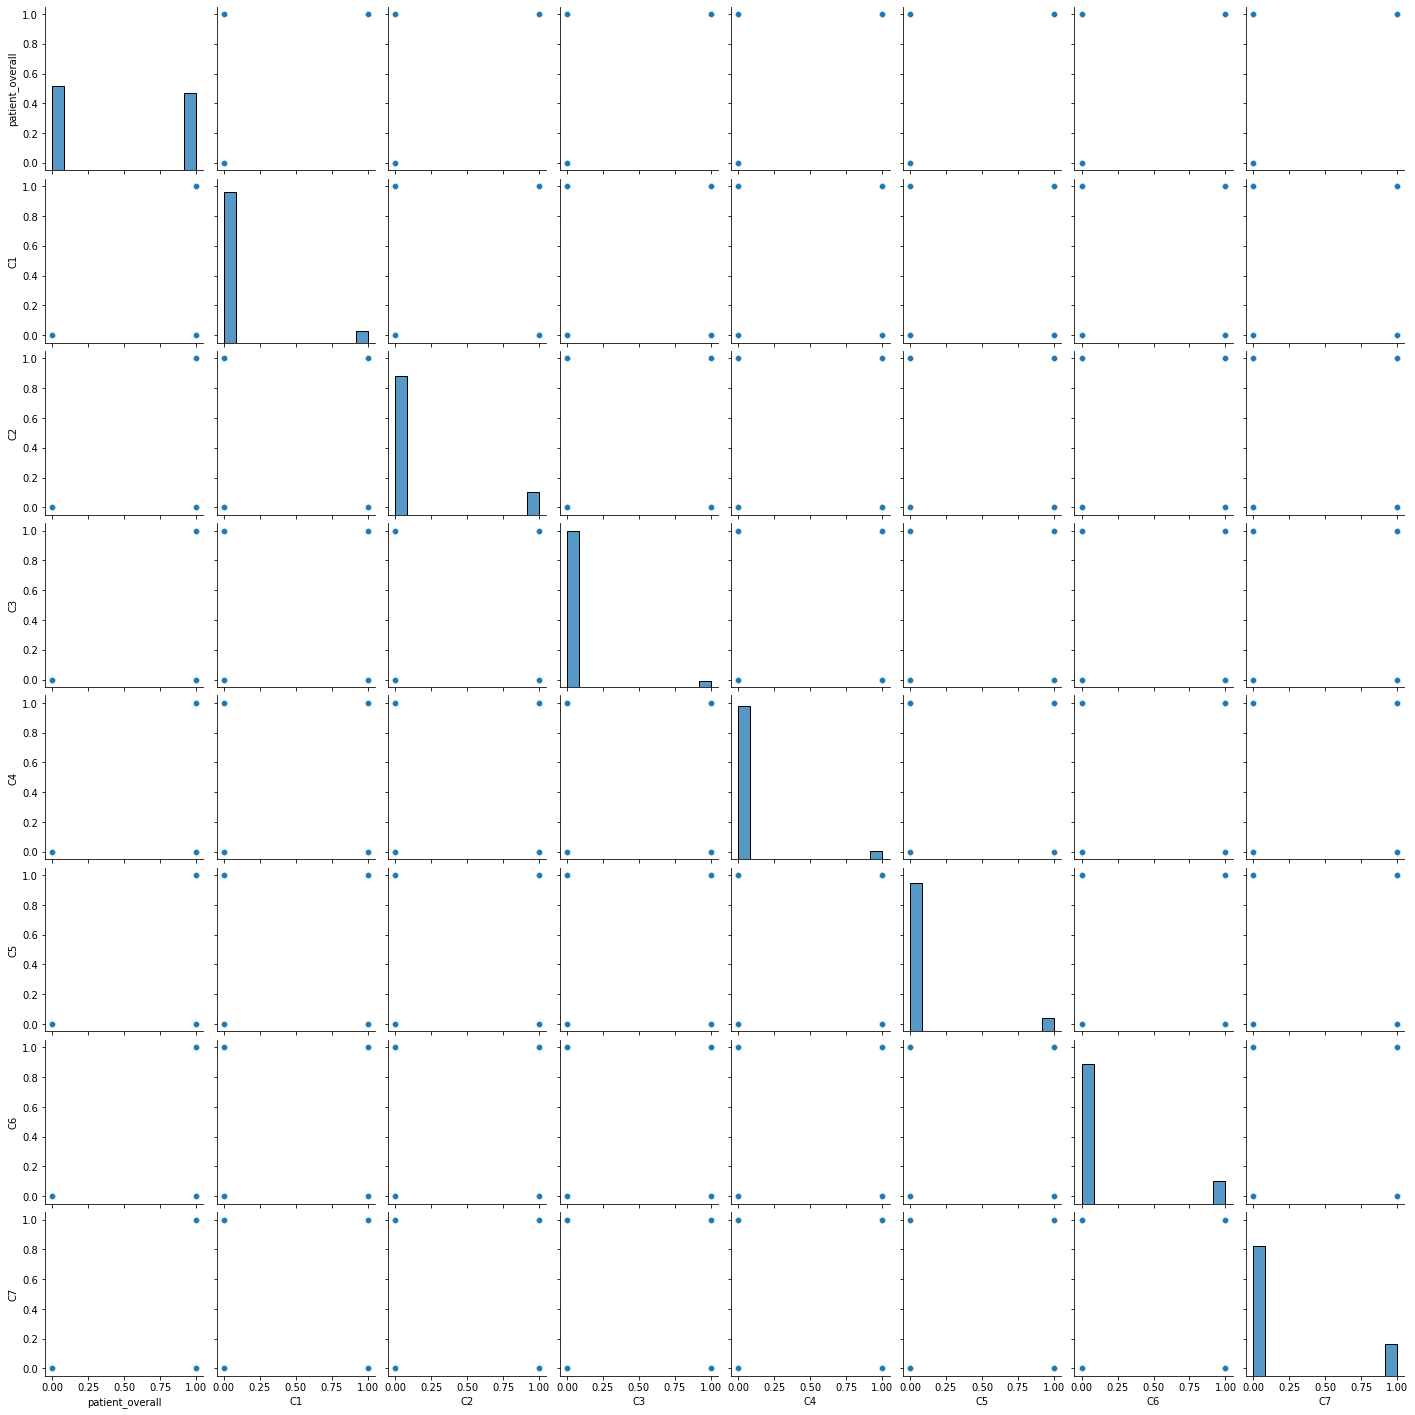

In [16]:
sns.pairplot(train)


<Figure size 1080x576 with 0 Axes>

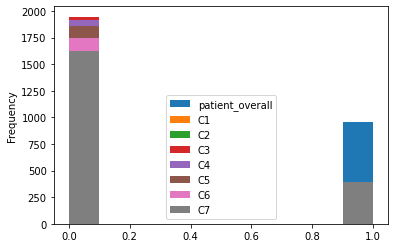

In [17]:
plt.figure(figsize = (15,8))
train.plot(kind = 'hist')
plt.show()

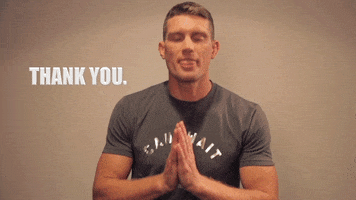

**To be continued** :-)